In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.metrics import rand_score

# 1. Preprocessing


# import the data and convert it to dataframe

In [2]:
df= read_csv("hepatitis.data",names=("Class","AGE","SEX","STEROID","ANTIVIRALS" ,"FATIGUE","MALAISE","ANOREXIA","LIVER BIG","LIVER FIRM",
"SPLEEN PALPABLE","SPIDERS","ASCITES","VARICES","BILIRUBIN","ALK PHOSPHATE","SGOT","ALBUMIN","PROTIME","HISTOLOGY"))
df = df.replace('?',np.nan)

In [3]:
df.head().transpose()

,0,1,2,3,4
Class,2,2,2,2,2
AGE,30,50,78,31,34
SEX,2,1,1,1,1
STEROID,1,1,2,NaN,2
ANTIVIRALS,2,2,2,1,2
FATIGUE,2,1,1,2,2
MALAISE,2,2,2,2,2
ANOREXIA,2,2,2,2,2
LIVER BIG,1,1,2,2,2
LIVER FIRM,2,2,2,2,2


In [4]:
df.shape

(155, 20)

In [5]:
#data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            155 non-null    int64 
 1   AGE              155 non-null    int64 
 2   SEX              155 non-null    int64 
 3   STEROID          154 non-null    object
 4   ANTIVIRALS       155 non-null    int64 
 5   FATIGUE          154 non-null    object
 6   MALAISE          154 non-null    object
 7   ANOREXIA         154 non-null    object
 8   LIVER BIG        145 non-null    object
 9   LIVER FIRM       144 non-null    object
 10  SPLEEN PALPABLE  150 non-null    object
 11  SPIDERS          150 non-null    object
 12  ASCITES          150 non-null    object
 13  VARICES          150 non-null    object
 14  BILIRUBIN        149 non-null    object
 15  ALK PHOSPHATE    126 non-null    object
 16  SGOT             151 non-null    object
 17  ALBUMIN          139 non-null    ob

In [6]:
df.isnull().sum()

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER BIG          10
LIVER FIRM         11
SPLEEN PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           6
ALK PHOSPHATE      29
SGOT                4
ALBUMIN            16
PROTIME            67
HISTOLOGY           0
dtype: int64

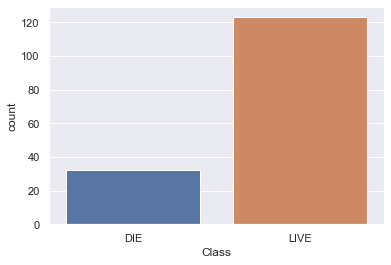

In [7]:
sns.set()
df["Class"] = df["Class"].astype(int)
class_count=sns.countplot(x="Class", data=df)
plt.gca().set_xticklabels(['DIE','LIVE']);

class_count.figure.savefig('class.png')

# identifiying missing values

In [9]:
df.isna().sum()/len(df)*100

Class               0.000000
AGE                 0.000000
SEX                 0.000000
STEROID             0.645161
ANTIVIRALS          0.000000
FATIGUE             0.645161
MALAISE             0.645161
ANOREXIA            0.645161
LIVER BIG           6.451613
LIVER FIRM          7.096774
SPLEEN PALPABLE     3.225806
SPIDERS             3.225806
ASCITES             3.225806
VARICES             3.225806
BILIRUBIN           3.870968
ALK PHOSPHATE      18.709677
SGOT                2.580645
ALBUMIN            10.322581
PROTIME            43.225806
HISTOLOGY           0.000000
dtype: float64

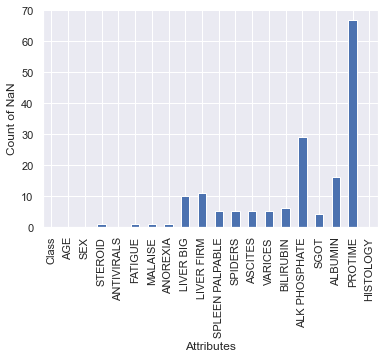

In [10]:
pd.isnull(df).sum()[0:20].plot(kind='bar')
plt.xlabel('Attributes')
plt.ylabel('Count of NaN');

# get the numeric columns and fill the missing values

In [13]:
df['BILIRUBIN']=pd.to_numeric(df['BILIRUBIN'],errors='coerce').astype('float64')
df['BILIRUBIN']=df['BILIRUBIN'].fillna(df['BILIRUBIN'].mean())

df["ALK PHOSPHATE"]=pd.to_numeric(df["ALK PHOSPHATE"],errors='coerce').astype('float64')
df["ALK PHOSPHATE"]=df["ALK PHOSPHATE"].fillna(df["ALK PHOSPHATE"].mean())

df["SGOT"]=pd.to_numeric(df["SGOT"],errors='coerce').astype('float64')
df["SGOT"]=df["SGOT"].fillna(df["SGOT"].mean())

df["ALBUMIN"]=pd.to_numeric(df["ALBUMIN"],errors='coerce').astype('float64')
df["ALBUMIN"]=df["ALBUMIN"].fillna(df["ALBUMIN"].mean())

df["PROTIME"]=pd.to_numeric(df["PROTIME"],errors='coerce').astype('float64')
df["PROTIME"]=df["PROTIME"].fillna(df["PROTIME"].mean())

In [112]:
df.isnull().sum()

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER BIG          10
LIVER FIRM         11
SPLEEN PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           0
ALK PHOSPHATE       0
SGOT                0
ALBUMIN             0
PROTIME             0
HISTOLOGY           0
dtype: int64

# get categorical columns and fill the missing values

In [113]:
df= df.fillna(df.mode().iloc[0])

In [114]:
df.isnull().sum()

Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64

# Standardizing the scale


In [115]:
sc = StandardScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df.drop("Class", axis=1)),columns = (df.drop("Class", axis=1)).columns)

# PCA

In [116]:
pca = PCA(n_components=2)
pca.fit(df_scaled)

# Transform samples using the PCA fit
pca_2d = pca.transform(df_scaled)

# 2. visualization

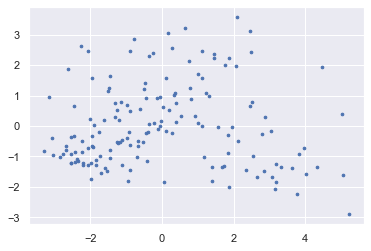

In [117]:
plt.scatter(pca_2d[:,0],pca_2d[:,1],s=7)
plt.show()

# 3. K_means

In [118]:
silhouette_coefficients =[]
randed_score=[]

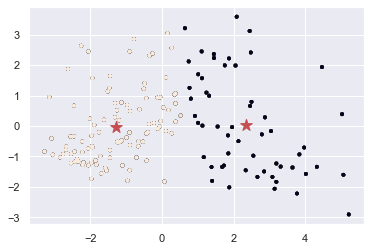

In [137]:


for i in range(31):
        
    km=KMeans(n_clusters=2, init ='random').fit(pca_2d)
    y_kmeans = km.fit_predict(pca_2d)
    
    #silhouetter score
    sil_score =silhouette_score(df_scaled, km.labels_) 
    silhouette_coefficients.append(sil_score)

    
    #RAND SCORE
    rn_score = rand_score(data['Class'],km.labels_)
    randed_score.append(rn_score)

    #visualisation clusters
    plt.scatter(pca_2d[:,0],pca_2d[:,1],s=7,c=km.labels_)

    
for i in range(2): 
    plt.scatter(km.cluster_centers_[i,0], km.cluster_centers_[i,1], marker='*', c='r', s=150)



In [138]:
np.max(randed_score)

0.6702136573104315

In [139]:
X1 = np.std(randed_score)
X2 = np.max(randed_score)
X3 = np.min(randed_score)
X4 = np.mean(randed_score)

In [140]:
np.min(silhouette_coefficients)

0.18260102414376123

In [141]:
Y1 = np.std(silhouette_coefficients)
Y2 = np.max(silhouette_coefficients)
Y3 = np.min(silhouette_coefficients)
Y4 = np.mean(silhouette_coefficients)

# 4. Generate Excel file 

In [143]:
path = r"C:\Users\MAXFRAME\Desktop\DamiExcel\data_hepatitis.xlsx"
dami={'rand_score':[X1,X2,X3,X4],'silhouette_coefficients':[Y1,Y2,Y3,Y4]}

df1 = pd.DataFrame(dami,index=['std','max','min', 'mean'])

writer = pd.ExcelWriter(path, engine = 'xlsxwriter')

df1.to_excel(writer)

writer.save()
writer.close()